# Dimensionality Reduction with PCA: Iris Dataset Demo

This notebook demonstrates PCA for dimensionality reduction using the classic Iris dataset.

In [7]:
# Import libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### PCA: 4D → 2D Projection
We'll reduce the 4-dimensional data to 2 principal components while preserving maximum variance.

In [8]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target
species_names = iris.target_names

print("Original data shape:", X.shape)
print("Features:", iris.feature_names)
print("Target classes:", species_names)

Original data shape: (150, 4)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']


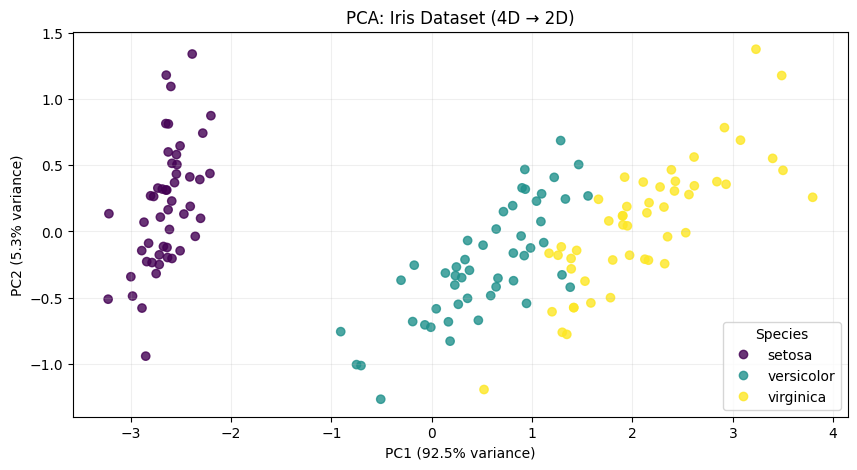

Variance retained in 2D: 97.8%


In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(10, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.title("PCA: Iris Dataset (4D → 2D)")
plt.legend(handles=scatter.legend_elements()[0], 
           labels=species_names.tolist(),
           title="Species")
plt.grid(True, alpha=0.2)
plt.savefig("../images/pca/4D_to_2D.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Variance retained in 2D: {sum(pca.explained_variance_ratio_):.1%}")

### Individual Principal Component Analysis
Let's examine how each principal component separates the data.

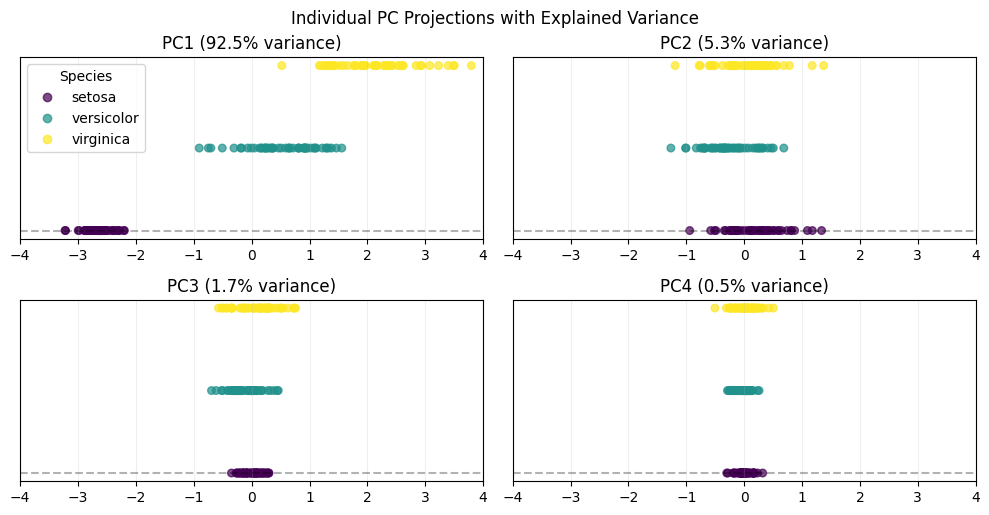

Variance explained per component:
PC1: 92.5%
PC2: 5.3%
PC3: 1.7%
PC4: 0.5%


In [ ]:
# Full PCA with all components
pca_full = PCA(n_components=4)
X_pca_full = pca_full.fit_transform(X)

# Create subplots
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i+1)
    scatter = plt.scatter(X_pca_full[:, i], np.zeros(len(X_pca_full)) + 0.1*y,
                         c=y, cmap='viridis', alpha=0.7, s=30)
    plt.axhline(0, color='black', linestyle='--', alpha=0.3)
    plt.title(f"PC{i+1} ({pca_full.explained_variance_ratio_[i]:.1%} variance)")
    plt.yticks([])
    plt.xlim(-4, 4)
    plt.grid(True, alpha=0.2)
    if i == 0:  # Add legend only once
        plt.legend(handles=scatter.legend_elements()[0],
                  labels=species_names.tolist(),
                  title="Species")

plt.tight_layout()
plt.suptitle("Individual PC Projections with Explained Variance", y=1.02)
plt.savefig("../images/pca/components.png", dpi=300, bbox_inches='tight')
plt.show()

# Print variance explained
print("Variance explained per component:")
for i, ratio in enumerate(pca_full.explained_variance_ratio_):
    print(f"PC{i+1}: {ratio:.1%}")

### Key Observations:
- PC1 captures 92.5% of the variance

- PC1 alone provides good class separation

- Higher PCs contribute minimal additional information

- 2D PCA retains 97.8% of total variance

## Cumulative Variance Visualization
 We will calculate and visualize the cumulative variance explained by the principal components on a synthetic dataset with 100 features, and identify the number of components needed to retain 80%, 90%, and 95% of the total variance.


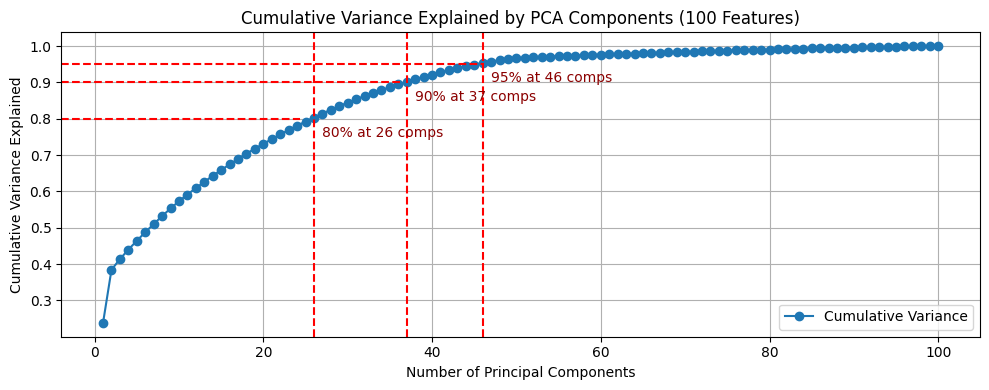

In [ ]:
from sklearn.datasets import make_classification

# Generate a synthetic dataset with 100 features
X, _ = make_classification(n_samples=1000, n_features=100, n_informative=50, random_state=42)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components required for 80%, 90%, and 95% variance
cutoffs = {}
for threshold in [0.80, 0.90, 0.95]:
    n_components = np.argmax(cumulative_variance >= threshold) + 1
    cutoffs[threshold] = n_components

# Plot cumulative variance
plt.figure(figsize=(10, 4))
plt.plot(np.arange(1, 101), cumulative_variance, marker='o', label='Cumulative Variance')
for threshold, n_components in cutoffs.items():
    plt.axhline(y=threshold, color='r', linestyle='--', xmax=n_components/100)
    plt.axvline(x=n_components, color='r', linestyle='--')
    plt.text(n_components + 1, threshold - 0.05, f'{int(threshold*100)}% at {n_components} comps', color='#8B0000')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PCA Components (100 Features)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("../images/pca/cumulative_variance.png", dpi=300, bbox_inches='tight')
plt.show()


## Key Observation

From the plot above, we observe the number of components required to capture various levels of variance:

- **80% variance**: 26 components (26% of original storage)
- **90% variance**: 37 components (37% of original storage)
- **95% variance**: 46 components (46% of original storage)

This highlights the efficiency of PCA in reducing dimensionality. Even at 95% variance retention, we can reduce the dataset to less than half its original size while preserving most of the information.
